In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [3]:
# example file
NY = pd.read_csv("../SAGDP/SAGDP11N_LA_1998_2021.csv")
NY

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""22000""",Louisiana,5.0,SAGDP11N,1.0,...,All industry total (percent change),Percent change,3.40,2.10,...,0.20,-2.90,3.00,-1.00,-2.00,2.20,1.70,-0.10,-7.90,1.30
1,"""22000""",Louisiana,5.0,SAGDP11N,2.0,...,Private industries,Percentage points,2.98,2.02,...,0.55,-2.42,3.43,-0.77,-1.96,2.01,1.62,-0.10,-7.72,1.35
2,"""22000""",Louisiana,5.0,SAGDP11N,3.0,11,"Agriculture, forestry, fishing and hunting",Percentage points,-0.25,0.09,...,0.09,0.08,-0.11,-0.03,0.06,0.01,0.03,-0.06,0.06,-0.16
3,"""22000""",Louisiana,5.0,SAGDP11N,4.0,111-112,Farms,Percentage points,-0.19,0.09,...,0.08,0.11,-0.13,-0.04,0.05,0.03,0.01,-0.03,0.06,-0.14
4,"""22000""",Louisiana,5.0,SAGDP11N,5.0,113-115,"Forestry, fishing, and related activities",Percentage points,-0.05,0.00,...,0.00,-0.03,0.01,0.01,0.01,-0.02,0.02,-0.03,0.01,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"""22000""",Louisiana,5.0,SAGDP11N,92.0,...,Private services-providing industries 3/,Percentage points,1.11,1.39,...,0.96,0.86,1.11,0.28,-0.72,0.02,0.96,0.18,-2.62,2.25
92,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,SAGDP11N: Contributions to percent change in r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,"Last updated: September 30, 2022-- revised sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#read the path
file_path = "../SAGDP"
file_list = os.listdir(file_path)
# locate .csv
csv_files = glob.glob('../SAGDP/*.{}'.format('csv'))
csv_files = [i[9:] for i in csv_files if 'ALL_AREAS' in i]
# merge
  
df_concat = pd.concat([pd.read_csv(f'../SAGDP/{f}') for f in csv_files ], ignore_index=True)
df_concat = df_concat.iloc[:-4]


In [5]:
# csv_files

In [13]:
'''
some of the GDP values in the years-columns
are recorded as strings instead of floats

convert to numeric
   ---> 
'''
# select columns
cols = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
        '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
        '2016', '2017', '2018', '2019', '2020', '2021', '1997', '1963', '1964',
        '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
        '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
        '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
        '1992', '1993', '1994', '1995', '1996']
df_numeric = df_concat.fillna(0)
df_numeric[cols] = df_numeric[cols].apply(pd.to_numeric, errors='coerce').fillna(0)

In [14]:
df_numeric.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
0,"""00000""",United States *,,SAGDP11N,1.0,...,All industry total (percent change),Percent change,4.50,4.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""00000""",United States *,,SAGDP11N,2.0,...,Private industries,Percentage points,4.15,4.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""00000""",United States *,,SAGDP11N,3.0,11,"Agriculture, forestry, fishing and hunting",Percentage points,-0.03,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""00000""",United States *,,SAGDP11N,4.0,111-112,Farms,Percentage points,-0.03,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""00000""",United States *,,SAGDP11N,5.0,113-115,"Forestry, fishing, and related activities",Percentage points,0.00,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
'''
some tables contain irrelvant data

drop values ('SASUMMARY' and '0') of column TableName 
 --->
'''
df_numeric.TableName.unique()
v = ['SAGDP11N', 'SAGDP1', 'SAGDP2N', 'SAGDP2S', 'SAGDP3N',
       'SAGDP3S', 'SAGDP4N', 'SAGDP4S', 'SAGDP5N', 'SAGDP5S', 'SAGDP6N',
       'SAGDP6S', 'SAGDP7N', 'SAGDP7S', 'SAGDP8N', 'SAGDP8S', 'SAGDP9N',
       'SAGDP9S']
df_numeric = df_numeric[df_numeric.TableName != 'SASUMMARY']
df_numeric = df_numeric[df_numeric.TableName != 0]

In [18]:
df_numeric.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
0,"""00000""",United States *,,SAGDP11N,1.0,...,All industry total (percent change),Percent change,4.50,4.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"""00000""",United States *,,SAGDP11N,2.0,...,Private industries,Percentage points,4.15,4.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""00000""",United States *,,SAGDP11N,3.0,11,"Agriculture, forestry, fishing and hunting",Percentage points,-0.03,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""00000""",United States *,,SAGDP11N,4.0,111-112,Farms,Percentage points,-0.03,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""00000""",United States *,,SAGDP11N,5.0,113-115,"Forestry, fishing, and related activities",Percentage points,0.00,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_numeric['Region'] = df_numeric['Region'].replace(' ','0')
df_numeric.GeoFIPS.unique()

i = df_numeric[(df_numeric.GeoName == 'United States *')].index
df_numeric.drop(i, inplace=True)

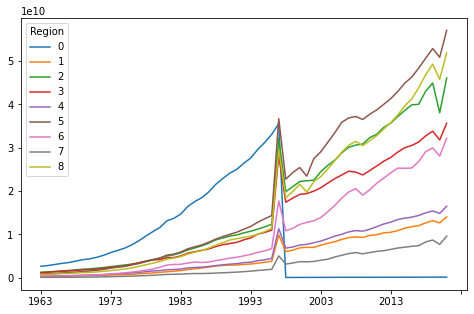

In [71]:
# df_numeric.drop(df_numeric['LineCode']).groupby('Region').sum().T.plot(figsize=(8,5));
# df_numeric.drop(df_numeric['LineCode']).groupby('Region').sum()

df_numeric.drop('LineCode', axis=1).groupby('Region').sum().T.sort_index(axis=0).plot(figsize=(8,5));